## Describing ''Non-Fickian'' diffusion 

Dealing with multiplicative processes requires employing new rules of calculs, and taking sides on the "Ito-Stratonovich" dilemma!

#### 1) Some Conventional Actors

In [1]:
%%html
<table><tr>
            <td><img src='./DATA_Lecture3/Ito.jpg' style=" transform:rotate(0deg);" ></td>
            <td><img src='./DATA_Lecture3/Strato.jpg' style="transform:rotate(0deg);" ></td>
            <td><img src='./DATA_Lecture3/Ito.jpg' style="transform:rotate(180deg);" ></td>
 </tr></table>

,,


#### 2) Less Conventional actors

In [2]:
%%html
<table><tr>
            <td><img src='./DATA_Lecture3/Fick.jpg' style=" width: 50% ; transform:rotate(0deg);" ></td>
            <td><img src='./DATA_Lecture3/Richardson_pic.png' style=" transform:rotate(0deg);" ></td>
 </tr></table>

,


#### 3) Richardson's dispersion as a backward-Ito SDE
###### Source:

Richardson, 1926, Atmospheric diffusion shown on a distance-neighbour graph, http://www.phys.sinica.edu.tw/jctsai/Jia2016/Reference/%5B12%5D_Richardson_1926ProcRoySoc_Atmospheric_diffusion_shown_on_a_distance-neighbour_graph.pdf

In [3]:
%%html
<table><tr>
            <td><img src='./DATA_Lecture3/Richardson_incipit.png' style=" width: 80% ; transform:rotate(0deg);" ></td>
            <td><img src='./DATA_Lecture3/Richardson_Graph.png'></td>
</tr></table>

,


##### Richardson's equation interpreted as a "1D Ito diffusion" in terms of the algebraic separation x

The diffusivity is  $$K = \epsilon x^{4/3}$$

##### ITO - SDE: $$ dx = \sqrt{2 K} dW   \;\; \rightarrow \;\; \partial_t q = \partial_{xx}( K(x) q)$$

##### Backward-ITO SDE : $$ dx = \sqrt{2 K} \diamond dW =  K_x dt + \sqrt{2 K} dW   \;\; \rightarrow \;\; \partial_t q = \partial_x( K(x)\partial_x q)$$

(0.1, 100.0)

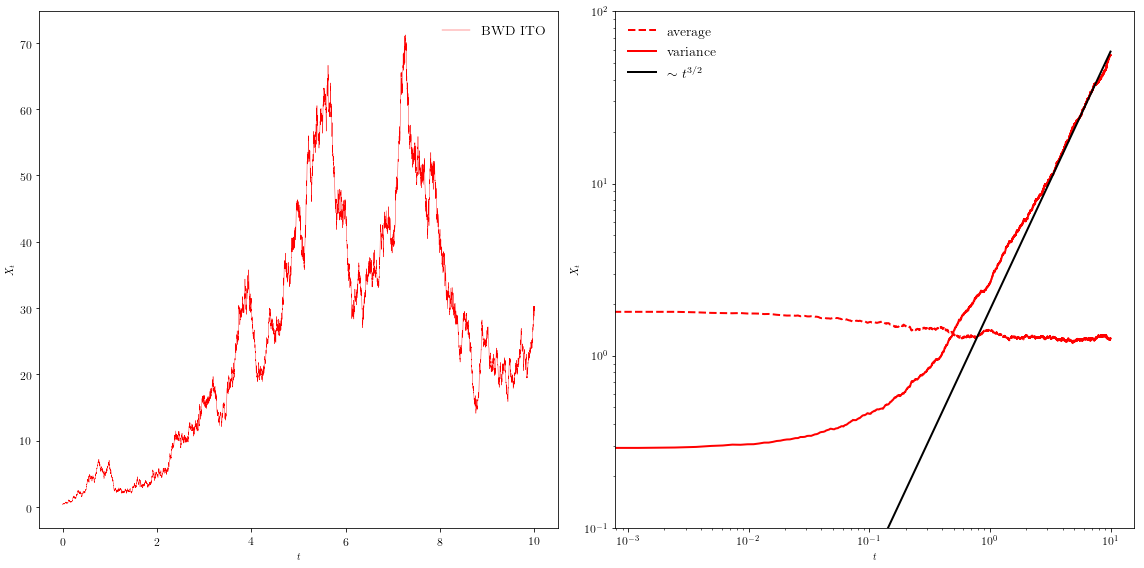

In [4]:
figheight=8
def Euler_Maruyama(sfunc,z0,time=np.linspace(0,1,100),W=None,args=()):
    M,NT=len(z0),len(time)
    z=np.zeros((NT,M))
    if W is None:
        W=np.random.randn(NT,M)
    z[0,:]=z0
    for i in range(0,NT-1):
        tau = time[i+1]-time[i]
        drift,diffusion,dummy=sfunc(z[i,:],time[i],*args)
        z[i+1,:] = z[i,:] + drift*tau+ diffusion*(W[i+1,:]-W[i,:])
    return z

def Richardson_BWDITO(z,t,epsilon):
    drift,diffusion,diffusionprime=(4/3)*2*epsilon*z**(1/3),np.sqrt(2*epsilon)*np.abs(z)**(2/3),(2/3)*np.sqrt(2*epsilon)*np.abs(z)**(-1/3)
    return drift,diffusion,diffusionprime

def Richardson_FWDITO(z,t,epsilon):
    drift,diffusion,diffusionprime=(4/3)*2*epsilon*z**(1/3)*0,np.sqrt(2*epsilon)*np.abs(z)**(2/3),(2/3)*np.sqrt(2*epsilon)*np.abs(z)**(-1/3)
    return drift,diffusion,diffusionprime

NT=2**13 #Timesteps
M=500 #MC sampling

time=np.linspace(0,10,NT)
W,DW=np.zeros((NT,M)),np.random.randn(NT,M)
for i in range(NT-1): W[i+1]=W[i]+np.sqrt(time[i+1]-time[i])*DW[i]
z0=np.random.rand(M)

fig,ax=subplots(1,2,figsize=(2*figheight,figheight),num='Samples')

z2= Euler_Maruyama(Richardson_BWDITO,z0,time=time,W=W,args=(1,))
#z3= Euler_Maruyama(Richardson_FWDITO,z0,time=time,W=W,args=(1,))


a=ax[0]
i=1
t=time
a.plot(t, z2[:,i],'r',lw=0.4,label='BWD ITO')
#a.plot(t, z3[:,i],'b',lw=0.4,label='FWD ITO')

#ztrue=z0[i]*np.exp((lam-0.5*mu**2)*t+W[::every,i]*mu)
#a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')

a=ax[1]
a.plot(t, z2.mean(axis=1)/np.sqrt(z2.var(axis=1)),'r--',lw=2,label='average')
a.plot(t, np.sqrt(z2.var(axis=1)),'r',lw=2,label='variance')

#a.plot(t, z3.mean(axis=1)/np.sqrt(z3.var(axis=1)),'b--',lw=2,label='average')
#a.plot(t, np.sqrt(z3.var(axis=1)),'b',lw=0.8,label='variance')

tmp=np.sqrt(z2.var(axis=1))
i=np.argmin(np.abs(t-1))
a.plot(t, 0.7*tmp[i]*t**(3/2),'k',lw=2,label='$\sim  t^{3/2}$')


#a.plot(t, ztrue,'k',lw=1,label='True')
a.legend()
a.set_xlabel('$t$')
a.set_ylabel('$X_t$')
a.set_xscale('log')
a.set_yscale('log')
a.set_ylim(1e-1,1e2)

In [6]:
%%html
<style>.container { width:99% !important; }</style>

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>
